In [ ]:
# USE HARDWARE ACCELERATION (edit=> runtime setting->gpu) for better result

<h1> THE CODE IS FOR 'GUESSING THE CORRELATION OF IMAGES' </h1>
using  https://www.kaggle.com/athosdamiani/guess-the-correlation data set
<h2> By Group 8 (COE17B020 ,CED17I047,COE17B031)</h2>


Execute each cell one by one<br>
FOR data upload to google colab ,<br>
UPLOAD csv file (execute cell below)
UPLOAD entrire zip and extract using !unzip


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
# go to edit ,runtime settings and set hardware accleration to gpu
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import time
import os

In [ ]:
#Connet drive

In [ ]:
!ls

drive  sample_data


In [ ]:
!cd drive


In [ ]:
!ls drive/My\ Drive/temprassignproj/data/

img_data  train_responses.csv


In [ ]:
!cp drive/My\ Drive/temprassignproj/data/train_responses.csv .

In [ ]:
#### Enter the path of file in your drive
!cp drive/My\ Drive/temprassignproj/data/train_responses.csv .
df = pd.read_csv('train_responses.csv') 
!unzip drive/My\ Drive/temprassignproj/data/img_data/19003_24748_upload_train_imgs.zip
####unzip data ###

Streaming output truncated to the last 5000 lines.
  inflating: train_imgs/swkeckwj.png  
  inflating: train_imgs/swkhjscb.png  
  inflating: train_imgs/swkiwset.png  
  inflating: train_imgs/swkjlekg.png  
  inflating: train_imgs/swkmaipf.png  
  inflating: train_imgs/swktjesf.png  
  inflating: train_imgs/swktpmcs.png  
  inflating: train_imgs/swkxtuuy.png  
  inflating: train_imgs/swkzkmhb.png  
  inflating: train_imgs/swlazdon.png  
  inflating: train_imgs/swldenft.png  
  inflating: train_imgs/swldvnll.png  
  inflating: train_imgs/swlejlmn.png  
  inflating: train_imgs/swlgfgsx.png  
  inflating: train_imgs/swlhihbq.png  
  inflating: train_imgs/swlprrmc.png  
  inflating: train_imgs/swlxljic.png  
  inflating: train_imgs/swlyzlqs.png  
  inflating: train_imgs/swmaafmc.png  
  inflating: train_imgs/swmapltr.png  
  inflating: train_imgs/swmepmfe.png  
  inflating: train_imgs/swmidvar.png  
  inflating: train_imgs/swmoqiqy.png  
  inflating: train_imgs/swmqbwng.png  
  inflating: 

<h2> Processing 150000 images and labels </h2>
<h4> This section process multiple sets of data (10000) </h4>

In [ ]:
import time

In [ ]:
# def getfiles(no_of_images,dataframe,randomies = True,chunks = 1 ,indivdiual_chunk_size = 10000):
def getfiles(no_of_images,dataframe,randomies = True,chunks = 1 ):
#
  if randomies:
    list1 = random.sample(range(0,150000),no_of_images)

    label = dataframe.iloc[list1,1].tolist()
    fielname = dataframe.iloc[list1,0].tolist()
    return label,fielname
  else:
    list1 = [i for i in range(no_of_images*(chunks-1) , no_of_images*(chunks))]
    label = dataframe.iloc[list1,1].tolist()
    fielname = dataframe.iloc[list1,0].tolist()
    return label,fielname




In [ ]:
def images_to_matr(filelists,dtaframe,size = (130,130),path = False):
    #specify size to resize and path for directory stored in
    matrm = []
    
    for filename in filelists:
        if path ==False:
            str1 = filename+".png"
            img = cv2.imread(str1)
            # img = cv2.imread(str1,cv2.IMREAD_GRAYSCALE)
            #remoe all axis part
            img = img[:130,20:,:]
            # img = img[:130,20:]

            if size!=(130,130):
                img = cv2.resize(img,size)
            img = img/255.0 # maintain matrix data in range 0 to 1
            img = img.tolist()
            img = np.asarray(img)
            # img.reshape((img.shape[0],img.shape[1],1))
        else:
            str1 = filename+".png"
            new_pat = os.path.join(path,str1)
            img = cv2.imread(new_pat)
            # img = cv2.imread(new_pat,cv2.IMREAD_GRAYSCALE)
            img = img[:130,20:,:]
            # img = img[:130,20:]

            if size!=(130,130):
                img = cv2.resize(img,size)
            img = img/255.0 # maintain matrix data in range 0 to 1
            img = img.tolist()
            img = np.asarray(img)
            # img.reshape((img.shape[0],img.shape[1],1))

        matrm.append(img)

    return matrm

In [ ]:
#loading and training in chunk
label,fielname = getfiles(10000,df,False,1)

size1 = (80,80)
matrm = images_to_matr(fielname,df,size = size1,path = 'train_imgs') 
input_size1 = (size1[0],size1[1],3)


combinelist = list(zip(label,matrm))
pdsdata = pd.DataFrame(combinelist,columns = ["Score","Matrix"]) #create pandas dataframe with both columns combined
labelsdata = pdsdata.iloc[0,:]



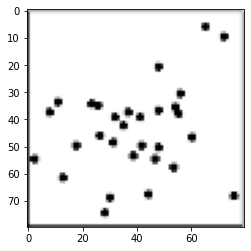

In [ ]:
SEE_IMAGE = 3
plt.imshow(matrm[SEE_IMAGE],cmap = plt.cm.binary)

In [ ]:
# new_label = []
# for i in label:
#   new_label.append(i)

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(150, (3, 3), activation='relu', input_shape=input_size1))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 150)       4200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 150)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        86464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
Total params: 127,592
Trainable params: 127,592
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
# model1.add(layers.Dense(2))
model1.add(layers.Dense(1,activation='linear'))

In [ ]:
type(labelsdata)

pandas.core.series.Series

In [ ]:
#conversion to numpy ,test_train_split and model.fit only work on numpy array
matrm2 = np.array(matrm)
new_label2 = np.array(label)

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(matrm2,new_label2,test_size = 0.2,shuffle = True)

In [ ]:
model1.compile(optimizer='adam',
              loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 150)       4200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 150)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        86464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [ ]:
history = model1.fit(X_train, y_train, batch_size = 120 ,epochs=9,verbose = 1 ,
                    validation_data=(X_test, y_test))

Epoch 1/9
67/67 [==============================] - 259s 4s/step - loss: 0.1116 - accuracy: 0.0000e+00 - val_loss: 0.0245 - val_accuracy: 0.0000e+00
Epoch 2/9
67/67 [==============================] - 260s 4s/step - loss: 0.0175 - accuracy: 0.0000e+00 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 3/9
67/67 [==============================] - 260s 4s/step - loss: 0.0081 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 4/9
67/67 [==============================] - 257s 4s/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 5/9
67/67 [==============================] - 259s 4s/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 6/9
67/67 [==============================] - 256s 4s/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 7/9
67/67 [==============================] - 257s 4s/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss

In [ ]:
model1.save_weights('bkupmain.h5', overwrite=True)


In [ ]:
for i in range(200):
  time.sleep(2)

KeyboardInterrupt: ignored

In [ ]:
label,fielname = [0,0]
matrm = 0


combinelist = 0
pdsdata = 0
labelsdata = 0
matrm2 = 0
new_label2 = 0

In [ ]:

label,fielname = getfiles(10000,df,False,2)

matrm = images_to_matr(fielname,df,size = size1,path = 'train_imgs') 
input_size1 = (size1[0],size1[1],3)


combinelist = list(zip(label,matrm))
pdsdata = pd.DataFrame(combinelist,columns = ["Score","Matrix"]) #create pandas dataframe with both columns combined
labelsdata = pdsdata.iloc[0,:]
matrm2 = np.array(matrm)
new_label2 = np.array(label)

# from sklearn.model_selection import train_test_split #already imported
X_train,X_test,y_train,y_test = train_test_split(matrm2,new_label2,test_size = 0.2,shuffle = True)
history = model1.fit(X_train, y_train, batch_size = 120 ,epochs=9,verbose = 2 ,
                  validation_data=(X_test, y_test))

Epoch 1/9
67/67 - 235s - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 2/9
67/67 - 236s - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 3/9
67/67 - 233s - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 4/9
67/67 - 233s - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 5/9
67/67 - 234s - loss: 9.5510e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 6/9
67/67 - 233s - loss: 8.0776e-04 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 7/9
67/67 - 233s - loss: 7.0330e-04 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 8/9
67/67 - 233s - loss: 7.0510e-04 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 9/9
67/67 - 234s - loss: 5.9779e-04 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00


In [ ]:
model1.save_weights('bkupmain.h5', overwrite=True)

In [44]:
# 10000 out of 150000 (do this 14 time more(we will do this less times))
for vartra in range(3,12):
  label,fielname = [0,0]
  matrm = 0


  combinelist = 0
  pdsdata = 0
  labelsdata = 0
  matrm2 = 0
  new_label2 = 0
  label,fielname = getfiles(10000,df,False,vartra)

  matrm = images_to_matr(fielname,df,size = size1,path = 'train_imgs') 
  input_size1 = (size1[0],size1[1],3)


  combinelist = list(zip(label,matrm))
  pdsdata = pd.DataFrame(combinelist,columns = ["Score","Matrix"]) #create pandas dataframe with both columns combined
  labelsdata = pdsdata.iloc[0,:]
  matrm2 = np.array(matrm)
  new_label2 = np.array(label)

  # from sklearn.model_selection import train_test_split #already imported
  X_train,X_test,y_train,y_test = train_test_split(matrm2,new_label2,test_size = 0.2,shuffle = True)
  history = model1.fit(X_train, y_train, batch_size = 120 ,epochs=5,verbose = 2 ,
                    validation_data=(X_test, y_test))
  model1.save_weights('bkupmain.h5', overwrite=True)
  pass

Epoch 1/5
67/67 - 230s - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 2/5
67/67 - 230s - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 3/5
67/67 - 231s - loss: 9.4738e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 4/5
67/67 - 233s - loss: 7.6601e-04 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 5/5
67/67 - 240s - loss: 6.8935e-04 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 1/5
67/67 - 259s - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 2/5
67/67 - 234s - loss: 9.2584e-04 - accuracy: 0.0000e+00 - val_loss: 9.0480e-04 - val_accuracy: 0.0000e+00
Epoch 3/5
67/67 - 234s - loss: 7.1754e-04 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 4/5
67/67 - 234s - loss: 6.1254e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/5

KeyboardInterrupt: ignored

In [ ]:
#function utility to check comparision between actual and predicted coreelation value

In [ ]:

from tensorflow.keras import backend as K

def test_for_ind_val(index,model1):
    
  inp = model1.input                                           # input placeholder
  outputs = [layer.output for layer in model1.layers]          # all layer outputs
  functors = [K.function([inp], [out]) for out in outputs] 

  x1 = np.array(matrm[index])[np.newaxis,...]
  layer_outs = [func([x1, 1.]) for func in functors]
  # print(layer_outs[-1])
  print(" Predicted = {},Expected = {} , ".format(layer_outs[-1][0][0][0],label[index]))
  # print(new_label[index])
  pass


NUMBER_OFTESTS = 12
TEST_ON_INDEX = random.sample(range(1,10000),NUMBER_OFTESTS)

for i in TEST_ON_INDEX:
  test_for_ind_val(i,model1)


 Predicted = -0.26058459281921387,Expected = -0.28297926699667364 , 
 Predicted = -0.429127961397171,Expected = -0.4820857504636191 , 
 Predicted = -0.2462019920349121,Expected = -0.24890677729127303 , 
 Predicted = -0.027882587164640427,Expected = -0.031553244936377706 , 
 Predicted = -0.09371084719896317,Expected = -0.09741065914871157 , 
 Predicted = -0.6352813839912415,Expected = -0.625575949215317 , 
 Predicted = 0.5419217944145203,Expected = 0.5865312944244495 , 
 Predicted = 0.09826070815324783,Expected = 0.0847307181453114 , 
 Predicted = 0.16274681687355042,Expected = 0.18127031604411767 , 
 Predicted = -0.05403859540820122,Expected = -0.029040123006350144 , 
 Predicted = -0.5189380049705505,Expected = -0.5220790703204754 , 
 Predicted = -0.8032470345497131,Expected = -0.8546500454037379 , 
